In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [22]:
def pol2cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

In [23]:
def Spectral_analysis_CD(select, theta, p, zeta):
    n1, n2 = len(theta), len(p)
    vel = np.zeros((n1, n2))
    for j in range(len(p)):
        pct = p[j] * np.cos(theta)
        pst = p[j] * np.sin(theta)
        if select == 2:
            D2kx = -(-2 + 2 * np.cos(pct))
            D2kz = -(-2 + 2 * np.cos(pst))
        elif select == 4:
            D2kx = -(-30 + 16 * 2 * np.cos(pct) - 2 * np.cos(2 * pct)) / 12
            D2kz = -(-30 + 16 * 2 * np.cos(pst) - 2 * np.cos(2 * pst)) / 12
        elif select == 6:
            D2kx = -(-490 + 270 * 2 * np.cos(pct) - 27 * 2 * np.cos(2 * pct) + 2 * 2 * np.cos(3 * pct)) / 180
            D2kz = -(-490 + 270 * 2 * np.cos(pst) - 27 * 2 * np.cos(2 * pst) + 2 * 2 * np.cos(3 * pst)) / 180
        elif select == 8:
            D2kx = -( -14350 + 8064 * 2 * np.cos(pct) - 1008 * 2 * np.cos(pct * 2) + 128 * 2 * np.cos(3 * pct) - 9 * 2 * np.cos(4 * pct)) / 5040
            D2kz = -( -14350 + 8064 * 2 * np.cos(pst) - 1008 * 2 * np.cos(pst * 2) + 128 * 2 * np.cos(3 * pst) - 9 * 2 * np.cos(4 * pst)) / 5040
        temp = 0.5 * zeta * np.sqrt(D2kx + D2kz)
        c = 2 * np.arcsin(temp) / (zeta * p[j])
        vel[:, j] = c
    return vel


In [24]:
def Spectral_analysis_compact(select, theta, p, zeta):
    n1 = len(theta)
    n2 = len(p)
    vel = np.zeros((n1, n2))
    
    for j in range(n2):
        pct = p[j] * np.cos(theta)
        pst = p[j] * np.sin(theta)
        
        if select == 6:
            a = 12/11
            b = 3/11
            c = 0
            alpha = 2/11
            beta = 0
            
            num = a * 2 * (1 - np.cos(pct)) + (b/4) * 2 * (1 - np.cos(2*pct)) + (c/9) * 2 * (1 - np.cos(3*pct))
            den = 1 + alpha * 2 * np.cos(pct) + beta * 2 * np.cos(2*pct)
            D2kx = num / den
            
            num = a * 2 * (1 - np.cos(pst)) + (b/4) * 2 * (1 - np.cos(2*pst)) + (c/9) * 2 * (1 - np.cos(3*pst))
            den = 1 + alpha * 2 * np.cos(pst) + beta * 2 * np.cos(2*pst)
            D2kz = num / den
        
        temp = zeta * np.sqrt(D2kx + D2kz)
        c = np.arcsin(.5 * temp) * 2 / (zeta * p[j])
        vel[:,j] = c
    
    return vel

In [25]:
def plotting_polar(theta, c, fid, figsize=(20, 20)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(fid[0], fid[1], fid[2], projection='polar')
    for i in range(0, c.shape[1], 10):
        ax.plot(theta, c[:, i])
#     ax.set_xticklabels([])
#     ax.set_yticklabels([])
    xticks = np.round(theta*37.5*180/(np.pi))
    xticklabels = [f"{t}°" for t in xticks]
    ax.set_xticklabels(xticklabels)
    ax.set_title("Plotting polar", va='bottom')
    plt.show()

In [26]:
def plotting_surf(theta, p, c, fid):
    T, R = np.meshgrid(theta, p)
    X, Y = pol2cart(T, R)
    Z = c.T
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(fid[0], fid[1], fid[2], projection='3d')
    surf = ax.plot_surface(Y, X, Z, cmap='YlGnBu')
    ax.set_ylabel('k_x $\\rightarrow$')
    ax.set_xlabel('$\\leftarrow$ k_z')
    ax.set_zlabel('$c_{n,m}$')
    ax.set_title("Plotting Surface", va='bottom')
#    fig.colorbar(surf, aspect=1)
    ax.set_xlim(6, -6)
    ax.set_ylim(6, -6)
#     ax.set_zlim(1, 10)
    ax.view_init(azim = -60,elev = 30)
    plt.show()

<ipython-input-23-017915538714>:20: RuntimeWarning: invalid value encountered in divide
  c = 2 * np.arcsin(temp) / (zeta * p[j])
<ipython-input-25-8d00ff8b13c3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 432x288 with 0 Axes>

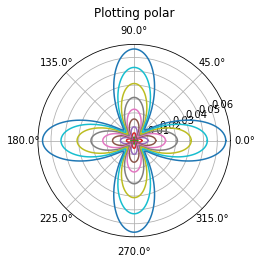

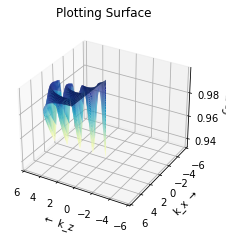

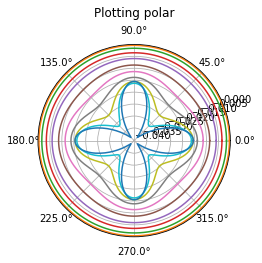

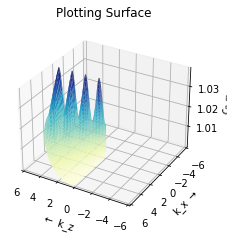

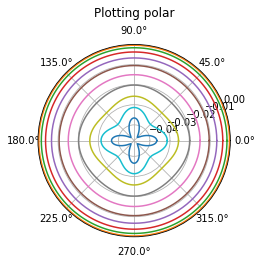

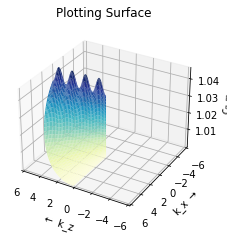

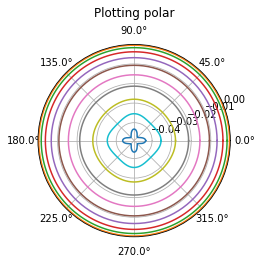

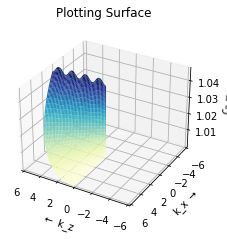

<ipython-input-24-da8ecf5ef2ce>:26: RuntimeWarning: invalid value encountered in divide
  c = np.arcsin(.5 * temp) * 2 / (zeta * p[j])


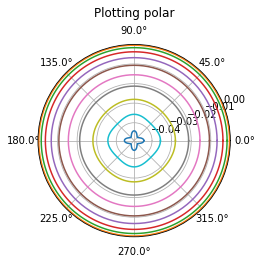

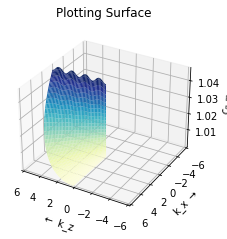

In [37]:
nt = 301
nk = 101
theta = np.linspace(0, 2*(np.pi), nt)
p = np.linspace(0, np.pi/2, nk)
#zeta= 1/np.sqrt(2)
zeta_coeff = [.9,.2,.5,.8,1,1.2,.9]
pi1 = 2
pi2 = 5
for i in range(1): # Change range to range(5) to iterate over all zeta coefficients
    plt.figure()
    zeta = zeta_coeff[i] / np.sqrt(2)
    c1 = Spectral_analysis_CD(2, theta, p, zeta)
    plotting_polar(theta, 1-c1, [pi1, pi2, 1])
    plotting_surf(theta, p, c1, [pi1, pi2, 1+pi2])

    c2 = Spectral_analysis_CD(4, theta, p, zeta)
    plotting_polar(theta, 1-c2, [pi1, pi2, 2])
    plotting_surf(theta, p, c2, [pi1, pi2, 2+pi2])

    c3 = Spectral_analysis_CD(6, theta, p, zeta)
    plotting_polar(theta, 1-c3, [pi1, pi2, 3])
    plotting_surf(theta, p, c3, [pi1, pi2, 3+pi2])

    c4 = Spectral_analysis_CD(8, theta, p, zeta)
    plotting_polar(theta, 1-c4, [pi1, pi2, 4])
    plotting_surf(theta, p, c4, [pi1, pi2, 4+pi2])

    c5 = Spectral_analysis_compact(6, theta, p, zeta)
    plotting_polar(theta, 1-c5, [pi1, pi2, 5])
    plotting_surf(theta, p, c5, [pi1, pi2, 5+pi2])
    